In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import pandas as pd

#define file path
opioid_file = "Wide_Master.csv"
#read CSV
opioid_data = pd.read_csv(opioid_file)
#make CSV into a dataframe
opioid_df_raw = pd.DataFrame(opioid_data)


opioid_df_raw.head()

,State,County,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,...,Income,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance"
0,Alabama,Baldwin,2011,10.0,NaN,NaN,NaN,186717.0,1589.78,1.0,...,67770.0,5147.0,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277
1,Alabama,Cullman,2011,NaN,NaN,NaN,NaN,80536.0,734.84,NaN,...,51374.0,1582.0,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610
2,Alabama,Etowah,2011,NaN,NaN,NaN,NaN,104303.0,534.99,NaN,...,51330.0,1833.0,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563
3,Alabama,Jefferson,2011,39.0,10.0,28.0,10.0,658931.0,1111.28,0.1,...,66409.0,20934.0,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034
4,Alabama,Madison,2011,14.0,NaN,12.0,NaN,340111.0,801.59,0.3,...,76342.0,14164.0,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690


In [3]:
# Check for rows that have missing data points and drop them
opioid_df = opioid_df_raw

opioid_df = opioid_df.dropna(subset=['LandArea', 'Income', 'Unemployment', 'GDP Total'])
len(opioid_df.index)

5048

In [4]:
# Make all other NaN in data 0
clean_df=opioid_df.fillna(0)

#Recalculate the Death Total as dataset documentation states totals do not all add up 
#"due to the fact that low death rate of a county was withheld from data to protect privacy of individuals" 
#for this study purposes those deaths with withheld information will not be used. All Death totals is a sum of the three possible causes.
clean_df['Death Total']=clean_df[['Heroin', 'Other', 'Methadone']].sum(axis=1)
#delete the original total column
del clean_df['Total']
clean_df.head(15)

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,5147.0,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277,0.0
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,1582.0,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610,0.0
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,1833.0,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563,0.0
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,20934.0,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034,48.0
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,14164.0,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690,12.0
5,Alabama,Mobile,2011,0.0,0.0,0.0,412577.0,1229.44,0.1,8.3,...,10353.0,34983.0,18327.0,89397.0,45351.0,77770.0,10.8,17901892.0,1474168,0.0
6,Alabama,Shelby,2011,0.0,0.0,0.0,197936.0,784.93,0.0,7.9,...,8237.0,35082.0,16044.0,28446.0,11010.0,37186.0,6.2,8268481.0,490108,0.0
8,Alabama,Tuscaloosa,2011,0.0,0.0,0.0,197211.0,1321.75,0.2,9.5,...,4714.0,17400.0,11918.0,35385.0,16568.0,31285.0,8.3,9382954.0,463507,0.0
9,Alabama,Walker,2011,0.0,0.0,17.0,66661.0,791.19,0.0,0.0,...,579.0,2881.0,1774.0,16597.0,11204.0,14207.0,11.3,1795958.0,185026,17.0
11,Alaska,Fairbanks North Star Borough,2011,0.0,0.0,0.0,99192.0,7338.21,1.1,13.1,...,4231.0,9714.0,6375.0,15289.0,4059.0,22632.0,6.4,5562537.0,375558,0.0


In [5]:
#Attempt to remove string values
clean_df = clean_df.replace(['(D)'], None)

In [6]:
# check to make sure the string value was removed
clean_df['GDP Education, Health, Social Assistance'].value_counts()

680292     3
683722     3
80349      3
274365     3
80720      3
          ..
412440     1
731883     1
3162857    1
75375      1
86274      1
Name: GDP Education, Health, Social Assistance, Length: 4896, dtype: int64

In [7]:
#Once string values removed, change column type to make math possible
clean_df['GDP Education, Health, Social Assistance'] = pd.to_numeric(clean_df['GDP Education, Health, Social Assistance'])

In [8]:
# Save into a new CSV called Clean_data.csv for analysis
clean_df.to_csv('clean_data.csv')

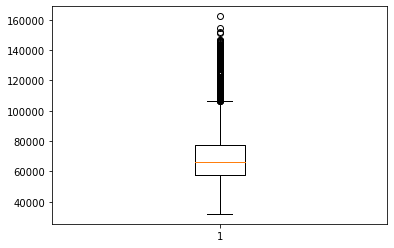

<Figure size 432x288 with 0 Axes>

In [9]:
# made a box plot to look into the distribution of the income data, it displayed alot of outliers which is to be expected due 
#to the how unevenly distributed wealth is in the US
incomes = clean_df['Income']
plt.boxplot(incomes)
plt.show()
plt.savefig('Income Boxplot')

In [10]:
#Determine the quantiles of the income data
quartiles = incomes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lowerq)
print(upper_bound)

57848.75
106492.5


In [11]:
#create pop density column
pop_density = clean_df['Population']/clean_df['LandArea']
pop_density

0       117.448326
1       109.596647
2       194.962523
3       592.947772
4       424.295463
           ...    
5407    313.677734
5408    728.971742
5409    392.216161
5410      4.334040
5411     14.895466
Length: 5048, dtype: float64

In [12]:
#Create a column in the Clean df for the population density
clean_df['Population Density'] = pop_density
clean_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277,0.0,117.448326
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610,0.0,109.596647
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563,0.0,194.962523
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034,48.0,592.947772
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690,12.0,424.295463


In [13]:
#create new dataframe for education data analysis
edu_df = clean_df.iloc[:,[16,17,18,19,20]]
edu_df.head()

,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree
0,22946.0,10923.0,36271.0,15094.0,39216.0
1,4807.0,2940.0,17883.0,12788.0,16286.0
2,6642.0,4270.0,22939.0,13064.0,24325.0
3,78798.0,48016.0,121313.0,58142.0,131726.0
4,50973.0,30157.0,48925.0,24067.0,62801.0


In [14]:
#create new list with total educated and calculate the percent of the total educated which have reached each education level
edu_df['Total Educated'] = edu_df.sum(axis=1)
edu_df['Bachelors %'] = edu_df['Bachelor_Degree']/edu_df['Total Educated']*100
edu_df['Grad %'] = edu_df['Grad_Degree']/edu_df['Total Educated']*100
edu_df['HS %'] = edu_df['HS_Grad']/edu_df['Total Educated']*100
edu_df['Less HS %'] = edu_df['Less_Than_HS']/edu_df['Total Educated']*100
edu_df['Associates %'] = edu_df['Associates_Degree']/edu_df['Total Educated']*100
#delete the counts of each education level as we will only be using the percents of the total educated
del edu_df['Bachelor_Degree']
del edu_df['Grad_Degree']                             
del edu_df['HS_Grad']                                     
del edu_df['Less_Than_HS']                                
del edu_df['Associates_Degree']
edu_df

<ipython-input-14-64b5e68324a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_df['Total Educated'] = edu_df.sum(axis=1)
<ipython-input-14-64b5e68324a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_df['Bachelors %'] = edu_df['Bachelor_Degree']/edu_df['Total Educated']*100
<ipython-input-14-64b5e68324a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450
1,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132
2,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143
3,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773
4,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826
...,...,...,...,...,...,...
5407,93734.0,21.674099,8.029104,30.188619,5.580686,34.527493
5408,277757.0,28.266074,14.650576,23.609126,3.997739,29.476485
5409,113634.0,19.547847,7.777602,34.327754,7.637679,30.709119
5410,26781.0,15.525933,7.740562,31.727717,8.890631,36.115156


In [15]:
# Merge the results of the education df with the clean df to add the % education levels
combined_df = pd.merge(clean_df,edu_df, left_index=True,right_index=True)
#Delete rows which will not be used in our analysis 
del combined_df['Bike']
del combined_df['Alone']
del combined_df['Carpool']
del combined_df['Walk']
del combined_df['Home']
del combined_df['Public']
del combined_df['Bachelor_Degree']
del combined_df['Grad_Degree']                             
del combined_df['HS_Grad']                                     
del combined_df['Less_Than_HS']                                
del combined_df['Associates_Degree']
combined_df

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,5016735.0,478277,0.0,117.448326,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,2298846.0,207610,0.0,109.596647,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,2801621.0,430563,0.0,194.962523,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,39515681.0,4542034,48.0,592.947772,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,19512201.0,1135690,12.0,424.295463,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,Wisconsin,Washington,2017,0.0,12.0,0.0,135101.0,430.70,89470.0,2956.0,...,5636773.0,476010,12.0,313.677734,93734.0,21.674099,8.029104,30.188619,5.580686,34.527493
5408,Wisconsin,Waukesha,2017,27.0,27.0,0.0,400621.0,549.57,105275.0,17376.0,...,28028503.0,2927629,54.0,728.971742,277757.0,28.266074,14.650576,23.609126,3.997739,29.476485
5409,Wisconsin,Winnebago,2017,0.0,0.0,0.0,170414.0,434.49,71572.0,4719.0,...,9274302.0,649081,0.0,392.216161,113634.0,19.547847,7.777602,34.327754,7.637679,30.709119
5410,Wyoming,Fremont,2017,0.0,0.0,0.0,39803.0,9183.81,70101.0,469.0,...,1595939.0,138479,0.0,4.334040,26781.0,15.525933,7.740562,31.727717,8.890631,36.115156


In [16]:
#Create a state df to look at state by state numbers from 2011 to 2017
state_df = combined_df.groupby(['State'])[['Heroin', 'Other','Methadone','Death Total', 'Population','LandArea']].sum()
aver_income = combined_df.groupby(['State'])[['Income', 'Non_US_Born','GDP Total']].mean()
state_df = pd.merge(aver_income, state_df, left_index=True,right_index=True)
state_df

,Income,Non_US_Born,GDP Total,Heroin,Other,Methadone,Death Total,Population,LandArea
State,,,,,,,,,
Alabama,64576.730159,7910.634921,1.205206e+07,428.0,328.0,108.0,864.0,15980631.0,62298.53
Alaska,81870.142857,2794.357143,4.190802e+06,0.0,10.0,0.0,10.0,1102195.0,163894.78
Arizona,61884.119048,113064.333333,4.311028e+07,1324.0,2151.0,409.0,3884.0,42349012.0,359471.42
Arkansas,62702.000000,9158.428571,8.413269e+06,0.0,271.0,0.0,271.0,7268049.0,28934.50
California,80820.428571,246919.938776,6.374420e+07,3127.0,6625.0,1483.0,11235.0,255751474.0,770515.90
Colorado,81450.071429,25159.214286,1.841025e+07,358.0,542.0,21.0,921.0,15631911.0,84533.54
Connecticut,94811.339286,52695.250000,3.030717e+07,1930.0,860.0,286.0,3076.0,25119335.0,33896.52
Delaware,74631.523810,22013.095238,2.091484e+07,331.0,263.0,32.0,626.0,6545528.0,13639.85
Florida,66936.857143,58201.710204,1.920038e+07,1826.0,5279.0,1127.0,8232.0,111108367.0,216777.75


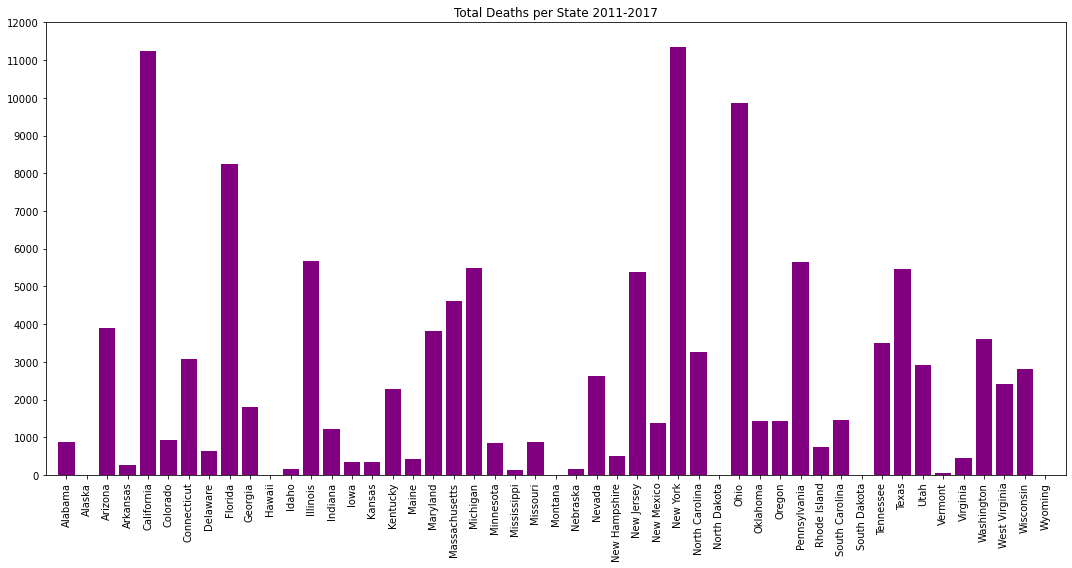

In [17]:
# Total Deaths per State 2011-2017 create a bar graph, this resulted in us making a new graph which desplayed the data per capita
#as we realized this format was not descriptive do to how different population were
yticks = [0, 1000, 2000, 3000, 4000, 5000, 
          6000, 7000, 8000, 9000, 10000, 11000, 12000]
plt.figure(figsize=(15, 8))
plt.bar(state_df.index, state_df['Death Total'], color='purple')
plt.title('Total Deaths per State 2011-2017')
plt.xticks(rotation='vertical')
plt.yticks(yticks)
plt.tight_layout()
plt.xlim(-1, 49, -.1)
plt.savefig('Total Deaths per State 2011-2017')
plt.show()

In [18]:
# use .loc to create a df for each year of analysis
eleven_df = clean_df.loc[clean_df['Year']==2011]
twelve_df = clean_df.loc[clean_df['Year']==2012]
thirteen_df = clean_df.loc[clean_df['Year']==2013]
fourteen_df = clean_df.loc[clean_df['Year']==2014]
fifteen_df = clean_df.loc[clean_df['Year']==2015]
sixteen_df = clean_df.loc[clean_df['Year']==2016]
seventeen_df = clean_df.loc[clean_df['Year']==2017]

In [19]:
#create new columns by state and year showing deaths
eleven_state = eleven_df.groupby(['State'])['Death Total'].sum()
twelve_state = twelve_df.groupby(['State'])['Death Total'].sum()
thirteen_state = thirteen_df.groupby(['State'])['Death Total'].sum()
fourteen_state = fourteen_df.groupby(['State'])['Death Total'].sum()
fifteen_state = fifteen_df.groupby(['State'])['Death Total'].sum()
sixteen_state = sixteen_df.groupby(['State'])['Death Total'].sum()
seventeen_state = seventeen_df.groupby(['State'])['Death Total'].sum()

In [20]:
#new dataframe deaths by state by year
year_death = pd.DataFrame({'2011':eleven_state, '2012':twelve_state, '2013':thirteen_state, '2014':fourteen_state, '2015':fifteen_state, '2016':sixteen_state, '2017':seventeen_state})
year_death

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,77.0,59.0,74.0,180.0,154.0,158.0,162.0
Alaska,0.0,0.0,0.0,0.0,10.0,0.0,0.0
Arizona,475.0,475.0,414.0,529.0,575.0,664.0,752.0
Arkansas,18.0,22.0,33.0,51.0,56.0,47.0,44.0
California,1665.0,1493.0,1615.0,1685.0,1657.0,1488.0,1632.0
Colorado,53.0,73.0,91.0,158.0,156.0,193.0,197.0
Connecticut,115.0,94.0,380.0,481.0,614.0,704.0,688.0
Delaware,88.0,40.0,61.0,92.0,88.0,74.0,183.0
Florida,1288.0,912.0,860.0,933.0,1213.0,1480.0,1546.0


In [21]:
#create new columns by state and year showing income
eleven_inc = eleven_df.groupby(['State'])['Income'].mean()
twelve_inc = twelve_df.groupby(['State'])['Income'].mean()
thirteen_inc = thirteen_df.groupby(['State'])['Income'].mean()
fourteen_inc = fourteen_df.groupby(['State'])['Income'].mean()
fifteen_inc = fifteen_df.groupby(['State'])['Income'].mean()
sixteen_inc = sixteen_df.groupby(['State'])['Income'].mean()
seventeen_inc = seventeen_df.groupby(['State'])['Income'].mean()

In [22]:
#new dataframe income by state by year
year_inc = pd.DataFrame({'2011':eleven_inc, '2012':twelve_inc, '2013':thirteen_inc, '2014':fourteen_inc, '2015':fifteen_inc, '2016':sixteen_inc, '2017':seventeen_inc})
year_inc

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,63323.666667,63377.111111,63466.666667,64024.000000,63994.555556,65666.555556,68184.555556
Alaska,77659.500000,79151.500000,80083.500000,81300.000000,82285.500000,85282.000000,87329.000000
Arizona,61439.833333,61053.166667,60590.500000,60766.166667,61088.333333,62789.666667,65461.166667
Arkansas,60047.833333,60307.500000,61256.000000,62484.333333,62972.000000,64468.500000,67377.833333
California,78248.342857,78245.542857,78279.828571,79398.914286,80267.400000,83368.971429,87934.000000
Colorado,78809.166667,79008.333333,79341.666667,80462.500000,81527.166667,83778.500000,87223.166667
Connecticut,91918.250000,92539.375000,93034.625000,94038.125000,94845.500000,97106.750000,100196.750000
Delaware,72154.666667,72546.666667,72947.000000,73874.000000,74658.666667,76138.333333,80101.333333
Florida,65974.857143,65428.800000,65043.000000,65842.342857,66527.885714,68441.457143,71299.657143


In [23]:
#create new columns by state and year showing population
eleven_pop = eleven_df.groupby(['State'])['Population'].mean()
twelve_pop = twelve_df.groupby(['State'])['Population'].mean()
thirteen_pop = thirteen_df.groupby(['State'])['Population'].mean()
fourteen_pop = fourteen_df.groupby(['State'])['Population'].mean()
fifteen_pop = fifteen_df.groupby(['State'])['Population'].mean()
sixteen_pop = sixteen_df.groupby(['State'])['Population'].mean()
seventeen_pop = seventeen_df.groupby(['State'])['Population'].mean()

In [24]:
#new dataframe population by state and year
year_pop = pd.DataFrame({'2011':eleven_pop, '2012':twelve_pop, '2013':thirteen_pop, '2014':fourteen_pop, '2015':fifteen_pop, '2016':sixteen_pop, '2017':seventeen_pop})
year_pop.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,2.494426e+05,2.509339e+05,2.524146e+05,2.539427e+05,2.550672e+05,2.562903e+05,2.575344e+05
Alaska,7.774250e+04,7.858600e+04,7.879150e+04,7.841700e+04,7.884500e+04,7.955550e+04,7.916000e+04
Arizona,9.667222e+05,9.783312e+05,9.904920e+05,1.007213e+06,1.022996e+06,1.039054e+06,1.053360e+06
Arkansas,1.682627e+05,1.698698e+05,1.715233e+05,1.727562e+05,1.744093e+05,1.762968e+05,1.782233e+05
California,1.016683e+06,1.026412e+06,1.034393e+06,1.047226e+06,1.056492e+06,1.059241e+06,1.066738e+06


In [25]:
#new dataframe with income per capita
inc_per = year_inc/year_pop 
inc_per.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,0.253861,0.252565,0.251438,0.252120,0.250893,0.256219,0.264759
Alaska,0.998932,1.007196,1.016398,1.036765,1.043636,1.071981,1.103196
Arizona,0.063555,0.062405,0.061172,0.060331,0.059715,0.060430,0.062145
Arkansas,0.356870,0.355022,0.357129,0.361691,0.361059,0.365682,0.378053
California,0.076964,0.076232,0.075677,0.075818,0.075975,0.078706,0.082433


In [26]:
# Calculate the average income per capita per state for 2011 to 2017 and create a column in the df for it
avg_inc_per = (inc_per['2011'] + inc_per['2012'] + inc_per['2013'] + inc_per['2014']\
+ inc_per['2015'] + inc_per['2016'] + inc_per['2017']) / 7
inc_per['avg income per'] = avg_inc_per
inc_per.head()

,2011,2012,2013,2014,2015,2016,2017,avg income per
State,,,,,,,,
Alabama,0.253861,0.252565,0.251438,0.252120,0.250893,0.256219,0.264759,0.254551
Alaska,0.998932,1.007196,1.016398,1.036765,1.043636,1.071981,1.103196,1.039729
Arizona,0.063555,0.062405,0.061172,0.060331,0.059715,0.060430,0.062145,0.061393
Arkansas,0.356870,0.355022,0.357129,0.361691,0.361059,0.365682,0.378053,0.362215
California,0.076964,0.076232,0.075677,0.075818,0.075975,0.078706,0.082433,0.077401


In [27]:
#new dataframe with deaths per capita
death_per = year_death/year_pop
death_per.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,0.000309,0.000235,0.000293,0.000709,0.000604,0.000616,0.000629
Alaska,0.000000,0.000000,0.000000,0.000000,0.000127,0.000000,0.000000
Arizona,0.000491,0.000486,0.000418,0.000525,0.000562,0.000639,0.000714
Arkansas,0.000107,0.000130,0.000192,0.000295,0.000321,0.000267,0.000247
California,0.001638,0.001455,0.001561,0.001609,0.001568,0.001405,0.001530


In [28]:
#Calculate the average death per capita per state 
avg_death_per = (death_per['2011'] + death_per['2012'] + death_per['2013'] + death_per['2014']\
+ death_per['2015'] + death_per['2016'] + death_per['2017']) / 7

In [29]:
#Add a column to the df with average death per capita 
death_per['avg deaths per'] = avg_death_per
death_per

,2011,2012,2013,2014,2015,2016,2017,avg deaths per
State,,,,,,,,
Alabama,0.000309,0.000235,0.000293,0.000709,0.000604,0.000616,0.000629,0.000485
Alaska,0.000000,0.000000,0.000000,0.000000,0.000127,0.000000,0.000000,0.000018
Arizona,0.000491,0.000486,0.000418,0.000525,0.000562,0.000639,0.000714,0.000548
Arkansas,0.000107,0.000130,0.000192,0.000295,0.000321,0.000267,0.000247,0.000223
California,0.001638,0.001455,0.001561,0.001609,0.001568,0.001405,0.001530,0.001538
Colorado,0.000149,0.000203,0.000249,0.000425,0.000412,0.000501,0.000505,0.000349
Connecticut,0.000257,0.000209,0.000845,0.001070,0.001368,0.001575,0.001534,0.000980
Delaware,0.000291,0.000131,0.000198,0.000295,0.000279,0.000233,0.000571,0.000285
Florida,0.002979,0.002080,0.001937,0.002066,0.002632,0.003154,0.003234,0.002583


In [30]:
#Create a column in the combined df for death per capita, income per cpaita, and percent of the population that is non-US born
combined_df['death per capita'] = combined_df['Death Total']/combined_df['Population']
combined_df['Income Per Capita'] = combined_df['Income']/combined_df['Population']
combined_df['Percent Non-US Born'] = combined_df['Non_US_Born']/combined_df['Population']*100
combined_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,117.448326,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450,0.000000,0.362956,2.756578
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,109.596647,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132,0.000000,0.637901,1.964339
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,194.962523,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143,0.000000,0.492124,1.757380
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,592.947772,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773,0.000073,0.100783,3.176964
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,424.295463,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826,0.000035,0.224462,4.164523


In [31]:
#loc to find all values that were in the Q1 and all values that were above the upper bounds
lowest_inc = combined_df.loc[combined_df['Income']<lowerq]
highest_inc = combined_df.loc[combined_df['Income']>upper_bound]

#get a list of the deaths per capita for each df
lowest_inc_deaths = lowest_inc['death per capita']
highest_inc_deaths = highest_inc['death per capita']

#perform independent ttest, pvalue = < 0.05 thus we can reject the null hypothesis
st.ttest_ind(highest_inc_deaths,lowest_inc_deaths, equal_var=False )

Ttest_indResult(statistic=-3.1423360546381573, pvalue=0.0017202124823795916)

In [32]:
# get the sum of deaths by type for the lowest income segment of the data and save it as a variable
lowest_inc_drugs = lowest_inc[['Methadone', 'Heroin', 'Other']].sum()
print(lowest_inc_drugs )
# get the sum of deaths by type for the highest income segment of the data and save it as a variable
highest_inc_drugs = highest_inc[['Methadone', 'Heroin', 'Other']].sum()
print(highest_inc_drugs )

Methadone     559.0
Heroin       2889.0
Other        5843.0
dtype: float64
Methadone    1106.0
Heroin       6169.0
Other        5110.0
dtype: float64


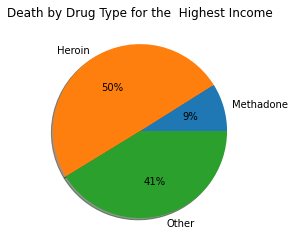

In [33]:
# Create a pie chart to display the highest income segment that shows the sum of each cause of death, add percentages, title and labels
labels = ['Methadone', 'Heroin', 'Other']
plt.pie(highest_inc_drugs, labels=labels, shadow = True, autopct = '%1.0f%%')
plt.title('Death by Drug Type for the  Highest Income')
plt.savefig('Death by Drug Type for the  Highest Income')

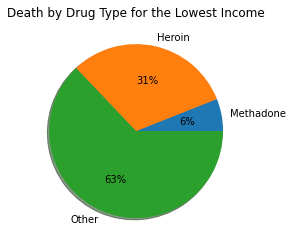

In [34]:
# Create a pie chart to display the lowest income segment that shows the sum of each cause of death, add percentages, title and labels
plt.pie(lowest_inc_drugs, labels=labels,shadow = True, autopct = '%1.0f%%')
plt.title('Death by Drug Type for the Lowest Income')
plt.savefig('Death by Drug Type for the Lowest Income')

In [35]:
# create a function to locate all of one state and groupe by the year
def state_info(state_name):
    state = combined_df.loc[combined_df['State'] == state_name]
    state = state.groupby('Year').sum()
    return state 

In [36]:
#Get NY data using state info function to make a dataframe
NY = state_info('New York')
NY    

,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",...,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born
Year,,,,,,,,,,,,,,,,,,,,,
2011,268.0,536.0,258.0,18107440.0,22460.38,2724130.0,3601175.0,291.4,1.275676e+09,117405250,...,186582.942385,12078245.0,588.375573,465.789609,1102.315772,452.509563,991.009482,0.001243,15.590899,344.895461
2012,446.0,505.0,290.0,18215324.0,22460.38,2759033.0,3665036.0,299.4,1.272006e+09,118839768,...,188474.121461,12178224.0,592.477110,471.114674,1082.285766,442.642248,1011.480201,0.001209,15.827292,348.772117
2013,581.0,531.0,214.0,18302166.0,22460.38,2792437.0,3722150.0,267.0,1.301721e+09,119251744,...,189703.050493,12285257.0,600.150923,478.181616,1073.636975,433.550988,1014.479499,0.001536,16.121222,352.876329
2014,758.0,522.0,194.0,18404035.0,22460.38,2828743.0,3791660.0,218.1,1.324770e+09,135097124,...,191325.062017,12404035.0,606.267509,486.790840,1067.987070,423.125670,1015.828911,0.002063,16.338999,356.501512
2015,960.0,602.0,175.0,18462055.0,22460.38,2853359.0,3852271.0,188.1,1.342207e+09,139095087,...,192505.771838,12511617.0,613.288818,492.331579,1063.952496,411.305788,1019.121318,0.002332,16.541671,360.414480
2016,1221.0,782.0,256.0,18420085.0,22460.38,2929767.0,3882327.0,174.0,1.370260e+09,129509199,...,192306.103767,12581222.0,622.855706,500.284330,1054.429502,403.220471,1019.209991,0.003282,17.040204,363.721918
2017,1280.0,738.0,220.0,18528779.0,22460.38,3044748.0,3942989.0,175.5,1.387281e+09,149356643,...,194228.799354,12739174.0,634.337327,508.704397,1048.885602,395.882831,1012.189843,0.003456,17.672349,367.847522


In [37]:
#Get FL data using stae info function to make a data frame
florida = state_info('Florida')
florida

,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",...,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born
Year,,,,,,,,,,,,,,,,,,,,,
2011,27.0,910.0,351.0,15131525.0,30968.25,2309120.0,1875859.0,358.8,615925803.0,62939376,...,19353.750714,10316136.0,555.594867,314.148217,1090.516954,447.772209,1091.967752,0.002262,10.863866,320.245034
2012,19.0,698.0,195.0,15344101.0,30968.25,2290008.0,1920614.0,303.9,626041830.0,63865503,...,19592.995106,10445287.0,558.675369,316.405282,1078.288083,441.787446,1104.843820,0.001478,10.684271,321.884632
2013,79.0,613.0,168.0,15537378.0,30968.25,2276505.0,1963220.0,258.5,642705654.0,65439509,...,19823.859459,10586576.0,561.090944,319.958080,1075.700051,432.564711,1110.686214,0.001313,10.504750,322.981741
2014,247.0,576.0,110.0,15808767.0,30968.25,2304482.0,2028442.0,223.2,671167936.0,68676607,...,20144.144720,10768142.0,567.387777,327.376436,1073.373877,420.690593,1111.171317,0.001481,10.515363,325.871450
2015,442.0,650.0,121.0,16130722.0,30968.25,2328476.0,2088491.0,194.7,692872506.0,70568274,...,20529.266947,10973466.0,578.093273,333.926553,1069.791765,403.461180,1114.727228,0.002033,10.435003,327.455541
2016,496.0,869.0,115.0,16425109.0,30968.25,2395451.0,2148538.0,171.1,715835432.0,72151668,...,20890.925878,11191729.0,589.532080,341.330194,1058.166342,394.789697,1116.181687,0.002412,10.561153,329.466839
2017,516.0,963.0,67.0,16730765.0,30968.25,2495488.0,2234255.0,149.3,739543222.0,75690104,...,21244.582154,11436947.0,601.389075,349.609252,1051.646037,378.334675,1119.020960,0.002408,10.848703,334.852077


In [38]:
#get OH data using state info function to make a dataframe
ohio = state_info('Ohio')
ohio

,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",...,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born
Year,,,,,,,,,,,,,,,,,,,,,
2011,335.0,464.0,71.0,9924209.0,22210.42,2868664.0,347806.0,431.5,480568860.0,49898742,...,22024.215330,6597897.0,617.903696,362.472980,1770.732837,576.203722,1272.686765,0.002162,26.786587,95.336478
2012,551.0,371.0,49.0,9928591.0,22210.42,2895622.0,352612.0,360.2,487287140.0,50765270,...,22029.726265,6622285.0,627.043895,363.873771,1754.014497,552.706832,1302.361005,0.002118,27.169713,96.780495
2013,828.0,362.0,45.0,9957397.0,22210.42,2910535.0,360816.0,364.4,502895669.0,51274215,...,22086.490671,6652075.0,633.775208,370.568127,1745.502650,540.719640,1309.434375,0.003001,27.297046,98.152655
2014,1030.0,447.0,21.0,9981881.0,22210.42,2953664.0,367672.0,280.5,505837851.0,52481040,...,22134.407535,6684092.0,646.173402,378.454087,1732.750743,526.870255,1315.751513,0.004333,27.704783,99.329243
2015,1258.0,501.0,44.0,10003574.0,22210.42,2990827.0,374107.0,238.2,509128704.0,60006618,...,22175.056730,6718907.0,656.433537,384.825524,1720.494320,508.348159,1329.898459,0.005747,28.044225,100.541830
2016,1268.0,613.0,27.0,10008735.0,22210.42,3074471.0,381269.0,243.4,517008790.0,60253597,...,22180.947885,6749410.0,669.886960,393.580449,1704.333889,492.728742,1339.469960,0.005156,28.874049,102.185282
2017,843.0,677.0,57.0,10053965.0,22210.42,3195871.0,396189.0,237.9,526897955.0,54710301,...,22275.788692,6789975.0,681.622635,405.281055,1696.035190,481.547795,1335.513326,0.003766,29.972971,105.045817


In [39]:
#get Kentucky data using state info function to make a dataframe
kentucky = state_info('Kentucky')
kentucky

,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",...,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born
Year,,,,,,,,,,,,,,,,,,,,,
2011,36.0,245.0,0.0,2560788.0,9996.87,1636467.0,77164.0,283.8,119581634.0,12275857,...,8663.256681,1678216.0,320.892502,223.450263,1001.989998,592.633634,761.033604,0.004840,35.587453,45.531764
2012,113.0,181.0,0.0,2571885.0,9996.87,1657517.0,79887.0,259.4,121601630.0,12126200,...,8707.960690,1694184.0,327.968322,226.187195,1001.790495,561.591028,782.462961,0.003093,36.192316,45.375042
2013,168.0,134.0,0.0,2587043.0,9996.87,1673176.0,82617.0,267.5,122544149.0,11841422,...,8761.416373,1708337.0,337.584956,231.350997,1000.546307,538.104954,792.412786,0.002559,36.582860,46.395791
2014,169.0,174.0,0.0,2600321.0,9996.87,1689258.0,86252.0,212.9,123987974.0,12594465,...,8814.819643,1722050.0,343.657843,233.367930,993.405902,525.363553,804.204772,0.002928,36.828183,47.943728
2015,208.0,154.0,0.0,2611801.0,9996.87,1704292.0,88134.0,180.7,125665226.0,12719965,...,8865.387583,1735495.0,348.472616,241.483853,993.064208,510.461162,806.518162,0.002849,36.636284,49.668677
2016,193.0,155.0,0.0,2621469.0,9996.87,1748455.0,89365.0,188.1,127603936.0,12970962,...,8900.719959,1746239.0,358.536212,243.969612,987.983842,493.944040,815.566295,0.002037,37.430609,49.130127
2017,165.0,181.0,0.0,2635753.0,9996.87,1824446.0,94038.0,167.0,129924029.0,13566894,...,8954.651357,1760418.0,365.517476,249.662478,976.222296,481.737655,826.860094,0.001908,39.108049,52.205372


In [40]:
#Get WV data using state info function to make a datframe
westVirginia = state_info('West Virginia')
westVirginia

,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",...,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born
Year,,,,,,,,,,,,,,,,,,,,,
2011,0.0,393.0,0.0,1377368.0,11173.26,1354769.0,15916.0,219.5,55396534.0,6514006,...,4103.721846,947855.0,262.277530,162.863281,1066.194783,493.188799,615.475607,0.009025,34.958014,21.511412
2012,12.0,241.0,0.0,1378289.0,11173.26,1381029.0,16839.0,211.4,55547762.0,6512506,...,4105.332618,952242.0,266.498114,165.275086,1063.013096,471.063916,634.149787,0.004735,35.747921,23.539620
2013,66.0,235.0,0.0,1377762.0,11173.26,1407947.0,17610.0,198.6,54229961.0,7022082,...,4106.435994,955384.0,271.941139,167.390314,1061.017817,458.642497,641.008233,0.005368,36.578403,25.456454
2014,81.0,285.0,0.0,1374732.0,11173.26,1423821.0,18543.0,197.3,53306129.0,7138396,...,4099.269642,957536.0,278.871423,169.901176,1066.381398,440.408776,644.437227,0.006852,37.248963,27.412825
2015,115.0,260.0,0.0,1370576.0,11173.26,1428538.0,19199.0,197.6,52687032.0,7081952,...,4090.035797,957402.0,280.712342,174.976306,1064.838267,426.946135,652.526950,0.006510,37.585257,27.790919
2016,165.0,217.0,0.0,1360490.0,11173.26,1461050.0,20081.0,180.7,53395273.0,7453235,...,4062.242131,957441.0,285.643715,179.752632,1058.297817,414.426517,661.879319,0.005196,38.777401,30.246935
2017,156.0,174.0,0.0,1348552.0,11173.26,1499087.0,20380.0,148.0,54256693.0,7272286,...,4030.807237,955042.0,287.080161,184.324516,1062.946648,399.391847,666.256828,0.004751,40.100772,31.133320


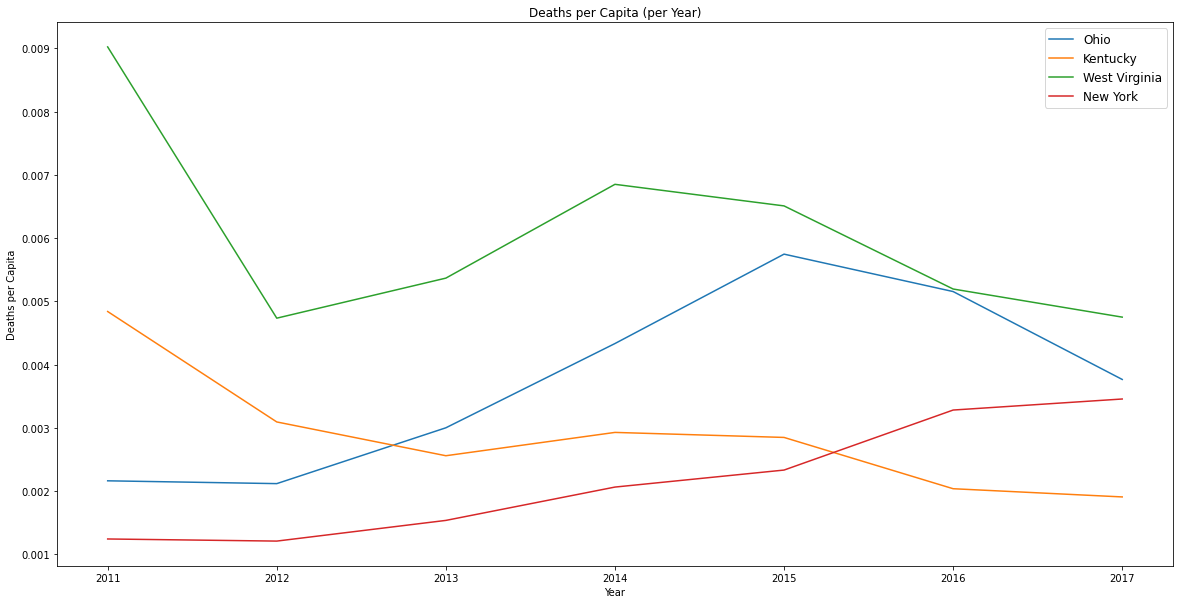

In [41]:
# Create a line graph for the year by year death capita of the top death states 
llabels = ['Ohio', 'Kentucky', 'West Virginia', 'New York']
plt.figure(figsize=(20,10))
plt.plot(ohio.index, ohio['death per capita'])
plt.plot(kentucky.index, kentucky['death per capita'])
plt.plot(westVirginia.index, westVirginia['death per capita'])
plt.plot(NY.index, NY['death per capita'])
plt.ylabel('Deaths per Capita')
plt.xlabel('Year')
plt.title('Deaths per Capita (per Year)')
# plt.yticks(yyyticks)
plt.legend(llabels, fontsize='large')
plt.savefig('Deaths per Capita (per Year).png')
plt.show()

In [42]:
# group the low income segment by the year and fid the mean population and do the same with the high income segment, save as variable
low_pop = lowest_inc.groupby(['Year'])['Population'].mean()
high_pop = highest_inc.groupby(['Year'])['Population'].mean()

In [43]:
#Find the sum of each drug by year for the low and the high income segment populations  and create data frames for each
low_her = lowest_inc.groupby(['Year'])['Heroin'].sum()
low_herPer = low_her/low_pop
low_oth = lowest_inc.groupby(['Year'])['Other'].sum()
low_othPer = low_oth/low_pop
low_meth = lowest_inc.groupby(['Year'])['Methadone'].sum()
low_methPer = low_meth/low_pop
high_her = highest_inc.groupby(['Year'])['Heroin'].sum()
high_herPer = high_her/high_pop
high_oth = highest_inc.groupby(['Year'])['Other'].sum()
high_othPer = high_oth/high_pop
high_meth = highest_inc.groupby(['Year'])['Methadone'].sum()
high_methPer = high_meth/high_pop
low_all_drugs = pd.DataFrame({'Heroin':low_herPer,'Other':low_othPer,'Methadone':low_methPer})
high_all_drugs = pd.DataFrame({'Heroin':high_herPer,'Other':high_othPer,'Methadone':high_methPer})
#check that the low income dataframe worked 
low_all_drugs

,Heroin,Other,Methadone
Year,,,
2011,0.001816,0.009557,0.000810
2012,0.002368,0.006684,0.001188
2013,0.003442,0.007024,0.000873
2014,0.003208,0.009102,0.000577
2015,0.006338,0.008908,0.000492
2016,0.005261,0.007155,0.000458
2017,0.004291,0.004107,0.000587


In [44]:
#check that the high income dataframe worked
high_all_drugs

,Heroin,Other,Methadone
Year,,,
2011,0.000368,0.000783,0.000161
2012,0.000713,0.000754,0.000249
2013,0.000859,0.000837,0.000230
2014,0.001220,0.000961,0.000229
2015,0.001515,0.001017,0.000122
2016,0.002158,0.001616,0.000393
2017,0.002518,0.001853,0.000309


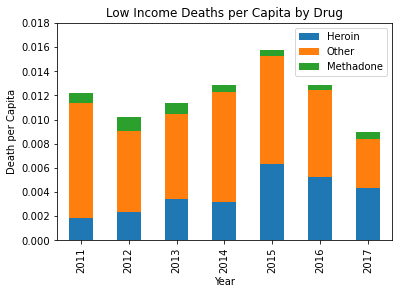

In [45]:
#use the low income drug by type by year df to make a bar chart by year that shows how much of the total was due to each drug
low_all_drugs.plot(kind='bar', stacked=True, ylim=(0,.018))
plt.ylabel('Death per Capita')
plt.title('Low Income Deaths per Capita by Drug')
plt.savefig('Deaths per Capita by Drug Low Income')

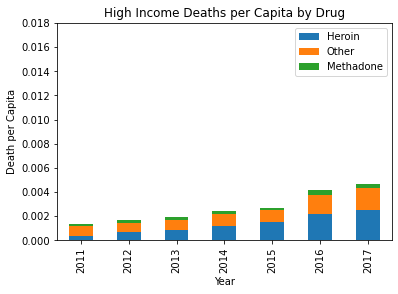

In [46]:
#use the high income drug by type by year df to make a bar chart by year that shows how much of the total was due to each drug
high_all_drugs.plot(kind='bar', stacked=True, ylim=(0,.018))
plt.ylabel('Death per Capita')
plt.title('High Income Deaths per Capita by Drug')
plt.savefig('Deaths per Capita by Drug High Income')

In [47]:
# Create a df that merges the low and high incolumn and makes the columns year by year and the income class the rows
low_inc = pd.DataFrame(lowest_inc.groupby(['Year'])['death per capita'].sum()).T
low_inc.rename(index={'death per capita':'Low Income'},inplace=True)
high_inc = pd.DataFrame(highest_inc.groupby(['Year'])['death per capita'].sum()).T
high_inc.rename(index={'death per capita':'High Income'},inplace=True)
inc_death = pd.concat([low_inc,high_inc])
inc_death

Year,2011,2012,2013,2014,2015,2016,2017
Low Income,0.019727,0.011079,0.011975,0.015313,0.016597,0.012185,0.007542
High Income,0.000731,0.001098,0.001335,0.001756,0.001957,0.003871,0.004191


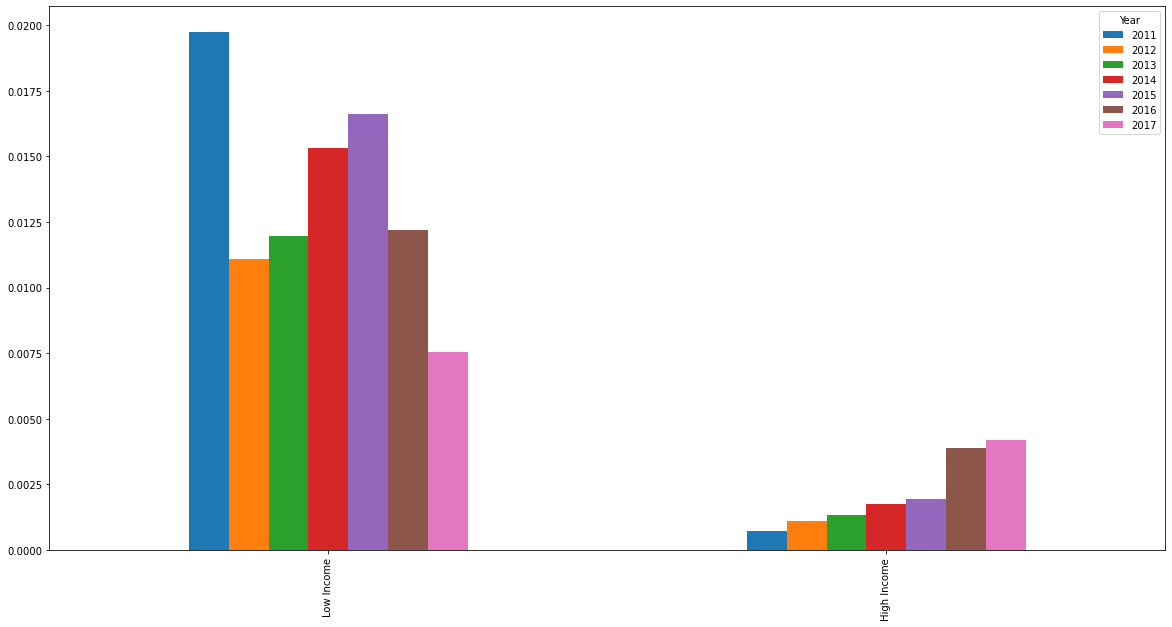

In [48]:
#create a bar chart for year by year data for the combined income group by death df. this does not specify the type of drug its only year by year and did not appear as helpful as others
inc_death.plot.bar(figsize=(20,10))
plt.savefig('Deaths by income group')

In [49]:
death_per.head()


,2011,2012,2013,2014,2015,2016,2017,avg deaths per
State,,,,,,,,
Alabama,0.000309,0.000235,0.000293,0.000709,0.000604,0.000616,0.000629,0.000485
Alaska,0.000000,0.000000,0.000000,0.000000,0.000127,0.000000,0.000000,0.000018
Arizona,0.000491,0.000486,0.000418,0.000525,0.000562,0.000639,0.000714,0.000548
Arkansas,0.000107,0.000130,0.000192,0.000295,0.000321,0.000267,0.000247,0.000223
California,0.001638,0.001455,0.001561,0.001609,0.001568,0.001405,0.001530,0.001538


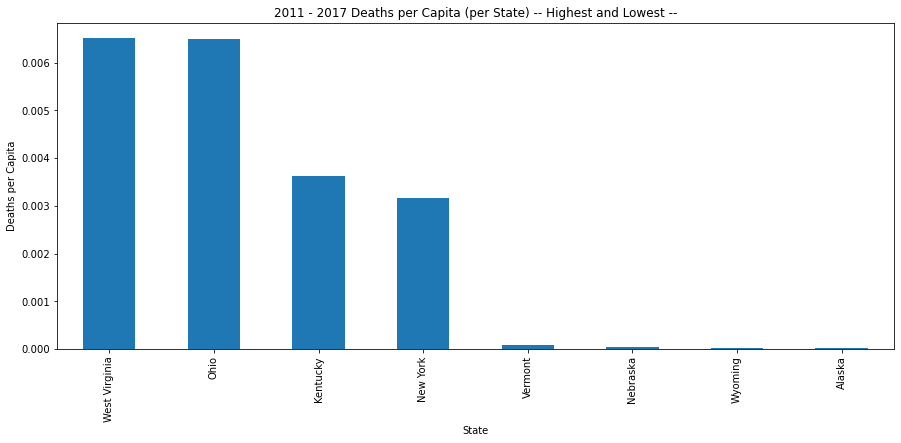

In [51]:
#use the df to make a bar chart of the top four states death by capita and the bottum 4 not including zeros as that is not giving us much visual info
new_fig = death_per.sort_values(['avg deaths per'],ascending=False)
new_fig[(new_fig['avg deaths per']>0.003171) | ((new_fig['avg deaths per']<0.0000900)&(new_fig['avg deaths per']>0))]\
['avg deaths per'].plot.bar(figsize=(15,6))
plt.xticks(rotation='vertical')
plt.title('2011 - 2017 Deaths per Capita (per State) -- Highest and Lowest --')
plt.ylabel('Deaths per Capita')
plt.savefig('2011 - 2017 Deaths per Capita (per State) -- Highest and Lowest --')
